# Investigation of Airplane Crashes Over The Last Century
### by Moustafa Ibrahim Ascoura

## Investigation Overview

This investigation aims to find any trends in the flight accidents over the last century. We try to find if there's any time-related issue that causes accidents to increase or decrease? Or if there's a certain type of aircrafts that tends to crash more often? Any reckless aircraft operators that have the most accidents? This investigation is hypothetical, The dataset is not guaranteed to be true. This is to show data analysis and visualisation abilities only and not intended for any other purposes. 

## Dataset Overview

The data set used in this project is present here https://www.kaggle.com/ruslankl/airplane-crashes-data-visualization. It is a record of over 5000 flight crashes from 1908 to 2008. For every entry, it shows the aircraft description and the location and time of the accident, it also provides the number of passengers aboard, number of victims and number of survivors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
flights = pd.read_csv('Airplane_Crashes.csv')
flights.drop(columns=['Flight #', 'Registration', 'cn/In', 'Summary'], inplace=True);
flights['Time'] = pd.to_datetime(flights['Time'], errors='coerce').dt.time;
flights['Date'] = pd.to_datetime(flights['Date']);
#Assign "Commercial" to route value for airplanes between two cities
routes = []
for x in flights.Route:
    if x not in ["Training", "Sightseeing", "Test flight", "Test"]:
        x = "Commercial"
    routes.append(x)
flights['Route'] = pd.Series(routes)
flights['year'] = flights.Date.dt.year



In [36]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5268 non-null   datetime64[ns]
 1   Time        3049 non-null   object        
 2   Location    5248 non-null   object        
 3   Operator    5250 non-null   object        
 4   Route       5268 non-null   object        
 5   Type        5241 non-null   object        
 6   Aboard      5246 non-null   float64       
 7   Fatalities  5256 non-null   float64       
 8   Ground      5246 non-null   float64       
 9   year        5268 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 411.7+ KB


## Timeline of the Dataset

What is the temporal distribution of the accidents in the dataset? Which period had the most accidents?

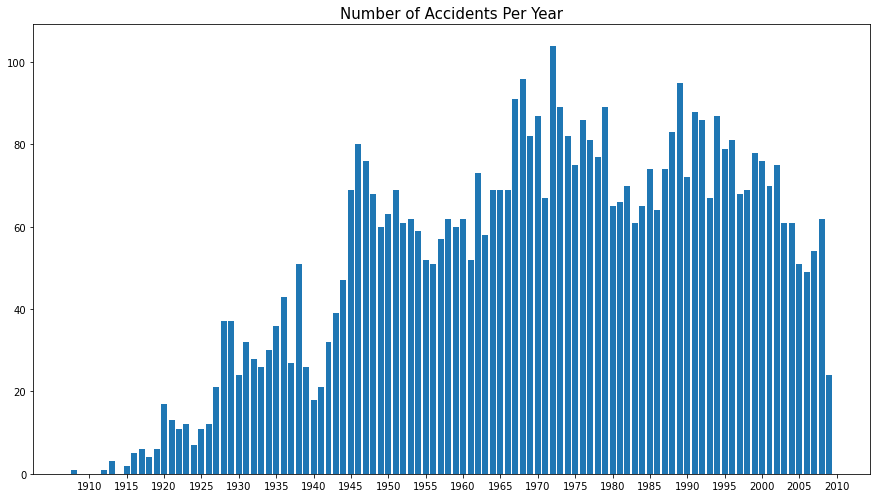

In [24]:
plt.figure(figsize=[ 15, 8.27])
years = flights.Date.dt.year.value_counts()
plt.bar(years.index,years);
plt.xticks([int(x) for x in range(1910, 2015, 5)]);
plt.title("Number of Accidents Per Year", fontsize = 15);

We have an unexpected increase in the number of aircrafts over the years. One could assume that the safety of aircrafts are increasing, then why more accidents? This is simply due to the fact that air travel has become more abundant over the years and thus more aircrafts are built and flown, therefore resulting in more accidents but not necessarily less safety.  

## What Aircraft Type Had the Most Accidents?

Reputation in the air transport industry is a crucial thing. Passengers won't fly in a jet that is 0.01 less safer than its competitive, would you? So let's take a look at what is the most type that has crashed in the last century. <em>We'll consider only the top 20 crashed.</em>

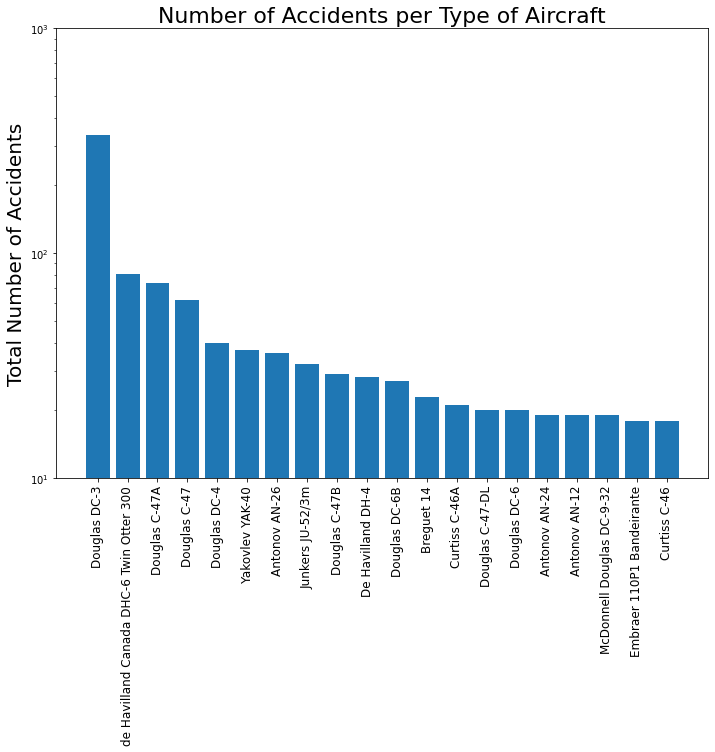

In [4]:
typs = flights.Type.value_counts()[:20]
plt.figure(figsize=[ 11.69, 8.27])
plt.bar(typs.index, typs)
plt.xticks(rotation = 90, fontsize=12);
plt.ylabel("Total Number of Accidents", fontsize=20);
plt.yscale('log')
plt.yticks([10,100,1000]);
plt.title("Number of Accidents per Type of Aircraft", fontsize=22);


We can see that Douglas DC-3 aircraft is the most plane type that crashed in the last century by a big margin. This is because it was the most popular aircraft in its era. The airliner produced above 600 ones of this type. This was a big deal back then. US relied heavily on it during the WWII; this might also explain the high number of crashes.

### So.. Is Douglas DC-3 The Worst Aircraft Ever?

Not exactly. To inspect this further, let's first take a look at the fatality rate and timeline of the accidents of this sepcific Airliner.

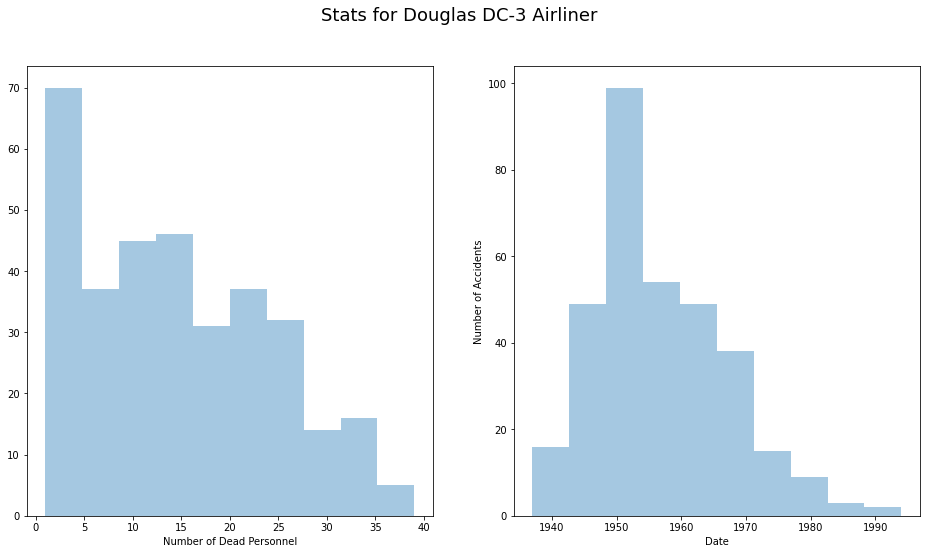

In [28]:
doug = flights.query("Type == 'Douglas DC-3'")
plt.figure(figsize=[ 16, 8.27])
plt.suptitle("Stats for Douglas DC-3 Airliner", fontsize = 18)

plt.subplot(1,2,1)
sb.distplot(doug.Fatalities, bins=10, kde=False);
plt.xlabel("Number of Dead Personnel")

plt.subplot(1,2,2)
sb.distplot(doug.Date.dt.year, bins=10, kde=False);
plt.ylabel("Number of Accidents");

Unfortuanetly, judging from the data in hand, we can say that's true. It was one of the earliest commercial airplanes. Most crashes had less than 5 people aboard meaning that it was a cargo flight. Average deaths per accident is between 10 and 20 persons.

It also had its most accidents during the period from 1945 to 1965. We were not as good in building aircrafts. But there's a spike in the number of accidents in 1950:1955 which draws attention and requires extra research.

## Most Accidents occur at what time of the day? Is it harder to save people at night?

Let's see the effect of the time of the day over the number of deaths and survivors. <em>We will drop the null values of the time column for this plot only.</em>



In [6]:
timed = flights.dropna(subset=['Time']);
timed['hour'] = [x[0:2] for x in timed.Time.to_string(index = False).split()]
timed.sort_values(inplace=True, by = ['hour']);
ftimed = timed.groupby(by=['hour']).sum()
ftimed.drop(columns=['Aboard', 'year'], inplace = True);

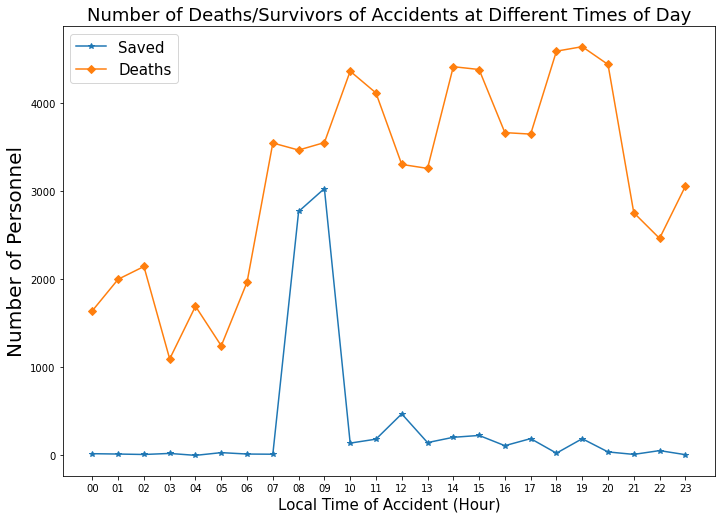

In [12]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.plot(ftimed.index, ftimed.Ground, linestyle='-', marker='*');
plt.plot(ftimed.index, ftimed.Fatalities, linestyle='-', marker='D');
plt.legend(["Saved", "Deaths"], fontsize=15);
plt.title("Number of Deaths/Survivors of Accidents at Different Times of Day", fontsize=18);
plt.ylabel("Number of Personnel", fontsize=20);
plt.xlabel("Local Time of Accident (Hour)", fontsize=15);

Accidents with most deaths occured between 7 am and 10 am. This is againt intuition as one may think that severe accidents are those at night, or at least more accidents will be at night thus more deaths then. 

The second line shows the that accidents at daytime had more resuced people than those at night (from 9 pm to 5 am). This is pretty logical as search and rescue operations are harder at night. 

## For the top 5 Aircraft Operators with the most accidents, let's draw a relation between the years and fatalities to see what year was the worst for each of them.

In [8]:
#List of top 5 operators
top5 = flights.Operator.value_counts().head(5).index

#Filter entries from the database
top5df = flights[flights["Operator"].isin(top5)]

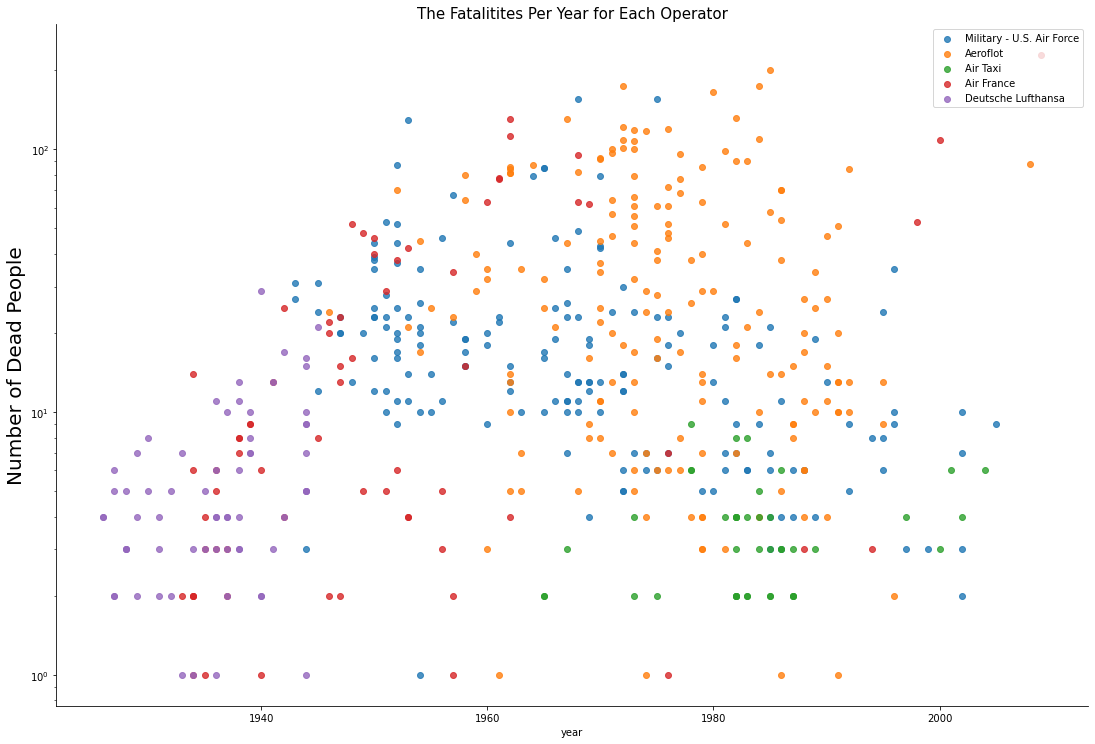

In [31]:
sb.lmplot( x="year", y="Fatalities", data=top5df, fit_reg=False, hue='Operator', legend=False, height=10, aspect=1.5);
plt.yscale('log');
plt.legend(loc='upper right');
plt.ylabel("Number of Dead People", fontsize=20)
plt.title("The Fatalitites Per Year for Each Operator", fontsize = 15);


It is apparent that the USAF is the operator who had most accidents and lost more lives. This is because it is the operator that tests new aircrafts and engage in dangerous maneuvers and flights. 

We can also notice that civil operators such as Air France and Lufthanthsa declined in number of victims and became safer in later years. While Aeroflot, which is the oldest airliner in the world, has a significant number of losses in the last 4 decades. 